In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import cv2

from pathlib import Path


In [ ]:
# Define Paths

# Root dataset directory (adjust if needed)
DATA_DIR = Path("../dataset")

# Train and test paths
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"

# Class names
CLASSES = ["NORMAL", "PNEUMONIA"]


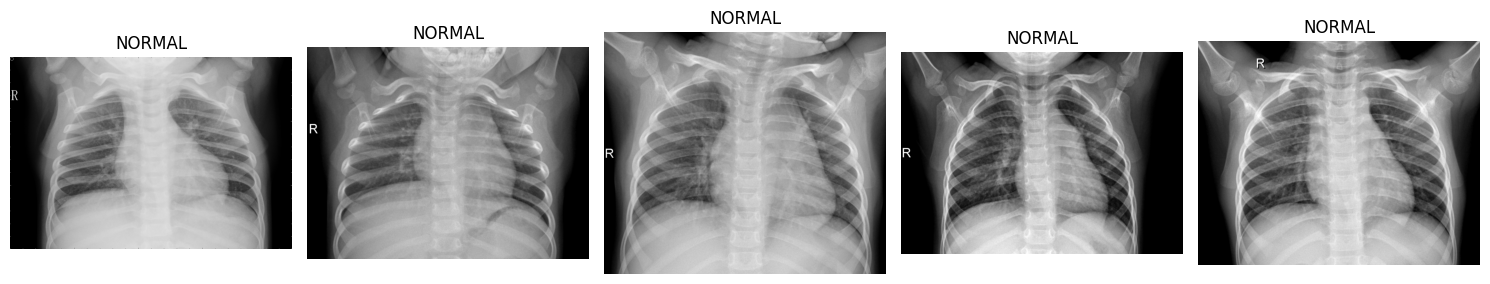

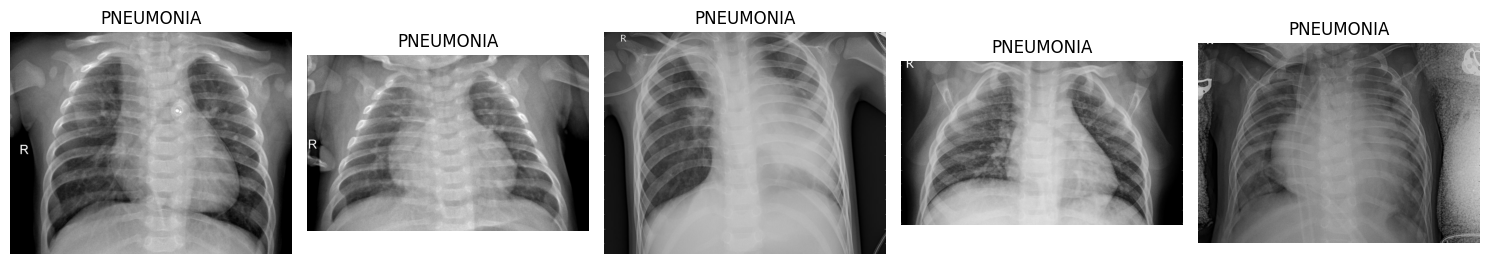

In [9]:
# a function to Visualize Random Images
def show_random_images(class_name, num_images=5, subset="train"):
    folder = DATA_DIR / subset / class_name
    images = os.listdir(folder)
    selected = random.sample(images, num_images)

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected):
        img_path = folder / img_name
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.tight_layout()
    plt.show()

# Show 5 random NORMAL and PNEUMONIA images
show_random_images("NORMAL")
show_random_images("PNEUMONIA")


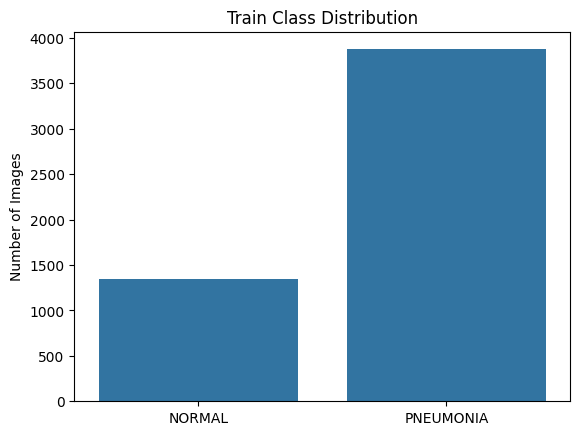

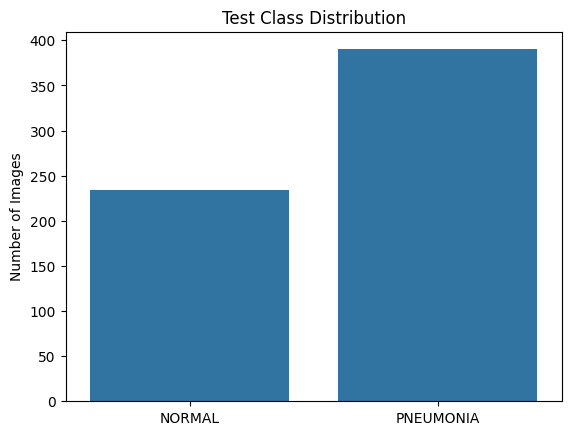

In [10]:
# Plot Class Distribution

def plot_class_distribution(subset="train"):
    counts = {}
    for cls in CLASSES:
        cls_path = DATA_DIR / subset / cls
        counts[cls] = len(os.listdir(cls_path))

    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(f"{subset.capitalize()} Class Distribution")
    plt.ylabel("Number of Images")
    plt.show()

plot_class_distribution("train")
plot_class_distribution("test")


Avg height: 1331.81, Avg width: 1678.64


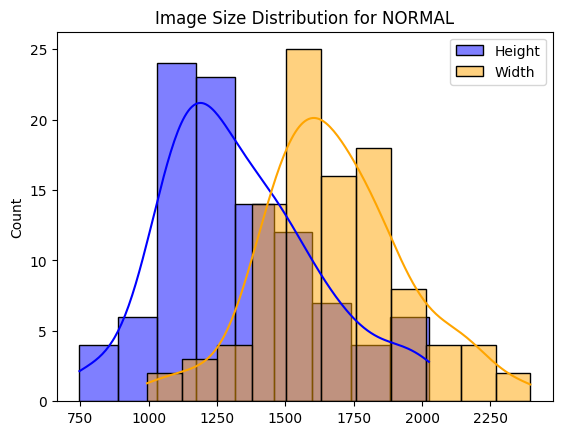

Avg height: 878.69, Avg width: 1234.97


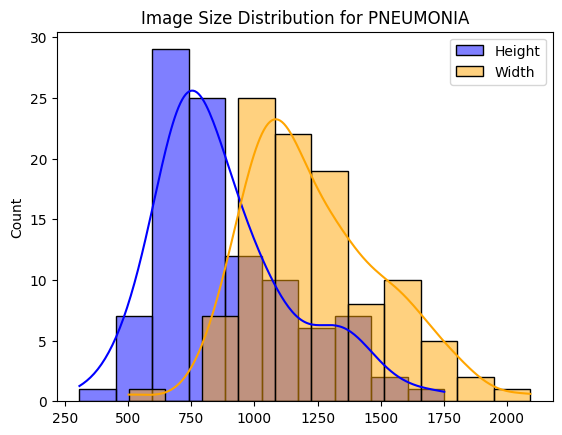

In [11]:
# Check Image Size

def analyze_image_shapes(subset="train", class_name="NORMAL", max_samples=100):
    folder = DATA_DIR / subset / class_name
    images = os.listdir(folder)[:max_samples]
    shapes = []

    for img_name in images:
        img_path = folder / img_name
        img = cv2.imread(str(img_path))
        if img is not None:
            shapes.append(img.shape)

    heights = [s[0] for s in shapes]
    widths = [s[1] for s in shapes]

    print(f"Avg height: {np.mean(heights):.2f}, Avg width: {np.mean(widths):.2f}")
    sns.histplot(heights, color='blue', label='Height', kde=True)
    sns.histplot(widths, color='orange', label='Width', kde=True)
    plt.legend()
    plt.title(f"Image Size Distribution for {class_name}")
    plt.show()

analyze_image_shapes("train", "NORMAL")
analyze_image_shapes("train", "PNEUMONIA")
